# Unsupervised Learning - Обучение без учителя

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split # разбиение данных на тренировочные и тестовые

from sklearn.compose import ColumnTransformer # преобразование столбцов
from sklearn.preprocessing import OneHotEncoder # кодирование категориальных переменных
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler # нормализация и масштабирование данных

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score # кроссвалидация
from sklearn.model_selection import GridSearchCV # подбор гиперпараметров с кроссвалидацией

from sklearn import datasets

from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import confusion_matrix, accuracy_score

from scipy.stats import randint
from sklearn.cluster import MiniBatchKMeans

import gc

sns.set()
%matplotlib inline

import sys
# np.set_printoptions(suppress=True)
# np.set_printoptions(threshold=sys.maxsize)
# np.set_printoptions(precision=3)

DISPLAY_MAX_ROWS = 20 #20
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)
pd.set_option('display.max_column', 100) # None)
plt.style.use('seaborn-whitegrid')


# plt.rcParams["figure.figsize"] = (20, 15)

import warnings
warnings.filterwarnings('ignore')

/var/folders/mw/bkx9xzrs45g7jqfptt8zy8740000gn/T/ipykernel_6416/2614341101.py:49: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Полезные ссылки

* [2. Unsupervised learning](https://scikit-learn.org/stable/unsupervised_learning.html)
* [2. Обучение без учителя](https://scikit-learn.ru/category/unsupervised_learning/)
* [7.1. Кластеризация - яндекс хэндбук](https://academy.yandex.ru/handbook/ml/article/klasterizaciya)
* [Открытый курс машинного обучения. Тема 7. Обучение без учителя: PCA и кластеризация](https://habr.com/ru/companies/ods/articles/325654/)
* [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
* [Оценка качества в задаче кластеризации - ИТМО](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8)
* [Оценка качества кластеризации: свойства, метрики, код на GitHub](https://habr.com/ru/companies/yandex/articles/500742/)
* [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habr.com/ru/articles/321216/)
* [Интересные алгоритмы кластеризации, часть вторая: DBSCAN](https://habr.com/ru/articles/322034/)
* [Как работает метод главных компонент (PCA) на простом примере](https://habr.com/ru/articles/304214/)
* [sklearn.decomposition](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)
* [sklearn.cluster: Clustering](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster)
* [sklearn.discriminant_analysis: Discriminant Analysis](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.discriminant_analysis)
* [2.3.10. Оценка эффективности кластеризации](https://scikit-learn.ru/clustering/#clustering-performance-evaluation)
* [2.3.11. Clustering performance evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation)
* []()

# Введение

Обучение без учителя (Unsupervised learning) это группа методов, которая работает с неразмеченными данными. При этом алгоритмы сами находят скрытые внутренние закономерности в данных.

Есть несколько типовых задач обучения без учителя:

- кластеризация - объединение группы объектов по общему признаку

- понижение размерности - выделение наиболее важных признаков

- автокодировщики - сжатие информации (Будет когда нейронные сети изучать будем)

# Понижение размерности

### описание датасета
1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results using the leave-one-out technique)

   In a classification context, this is a well posed problem 
   with "well behaved" class structures. A good data set 
   for first testing of a new classifier, but not very 
   challenging.

   (2) 
   S. Aeberhard, D. Coomans and O. de Vel,
   "THE CLASSIFICATION PERFORMANCE OF RDA"
   Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Journal of Chemometrics).

   Here, the data was used to illustrate the superior performance of
   the use of a new appreciation function with RDA. 

4. Relevant Information:

   -- These data are the results of a chemical analysis of
      wines grown in the same region in Italy but derived from three
      different cultivars.
      The analysis determined the quantities of 13 constituents
      found in each of the three types of wines. 

   -- I think that the initial data set had around 30 variables, but 
      for some reason I only have the 13 dimensional version. 
      I had a list of what the 30 or so variables were, but a.) 
      I lost it, and b.), I would not know which 13 variables
      are included in the set.

   -- The attributes are (dontated by Riccardo Leardi, 
	riclea@anchem.unige.it )
 	- 1) Alcohol
 	- 2) Malic acid
 	- 3) Ash
	- 4) Alcalinity of ash  
 	- 5) Magnesium
	- 6) Total phenols
 	- 7) Flavanoids
 	- 8) Nonflavanoid phenols
 	- 9) Proanthocyanins
	- 10)Color intensity
 	- 11)Hue
 	- 12)OD280/OD315 of diluted wines
 	- 13)Proline            

5. Number of Instances

    - class 1 59
	- class 2 71
	- class 3 48

6. Number of Attributes 
	
	13

7. For Each Attribute:

	All attributes are continuous
	
	No statistics available, but suggest to standardise
	variables for certain uses (e.g. for us with classifiers
	which are NOT scale invariant)

	NOTE: 1st attribute is class identifier (1-3)

8. Missing Attribute Values:

	None

9. Class Distribution: number of instances per class

    - class 1 59
	- class 2 71
	- class 3 48


## Загрузка данных

In [2]:
dataset = pd.read_csv('/Users/amirmukhamedzhan/Yandex.Disk.localized/Документы/KFU/ML/ML_FALL_2023/data/Wine.csv')
dataset.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1  
3   3.45     1480                 1  
4   2.93      735                 1

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
dataset.Customer_Segment.value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
X.shape, y.shape

((178, 13), (178,))

In [7]:
# разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## PCA

PCA (Principal Component Analysis) - это метод снижения размерности и одновременно извлечения ключевых признаков из многомерных данных. Он находит новые переменные (главные компоненты) как линейные комбинации исходных признаков, такие, что они максимизируют объясненную дисперсию данных. Главные компоненты упорядочены по убыванию объясненной дисперсии, что позволяет сохранить наибольшее количество информации в первых компонентах.

Вот основные шаги и характеристики PCA:

1. **Центрирование данных:** Сначала данные центрируются, вычитая среднее значение каждого признака из всех точек данных. Это делается для того, чтобы убрать смещение и обеспечить нулевое среднее для каждого признака.

2. **Вычисление ковариационной матрицы:** Затем вычисляется ковариационная матрица, которая описывает связь между всеми парами признаков в данных. Эта матрица симметрична и содержит дисперсии на диагонали и ковариации вне диагонали.

3. **Вычисление собственных векторов и собственных значений:** Далее находятся собственные векторы и собственные значения ковариационной матрицы. Собственные векторы представляют собой направления в пространстве признаков, а собственные значения определяют, насколько важны соответствующие собственные векторы.

4. **Выбор главных компонент:** Главные компоненты - это собственные векторы, соответствующие наибольшим собственным значениям. Обычно они упорядочены по убыванию собственных значений, и первые компоненты объясняют большую часть дисперсии в данных.

5. **Проекция данных на главные компоненты:** Данные проецируются на главные компоненты, исключая менее значимые компоненты. Это снижает размерность данных, сохраняя важные структурные характеристики.

Применение PCA может быть полезно в следующих случаях:

1. **Снижение размерности:** PCA позволяет сократить размерность данных, удалив шум и избыточность, что может упростить анализ.

2. **Улучшение визуализации:** PCA помогает визуализировать многомерные данные, проецируя их на двумерное или трехмерное пространство.

3. **Улучшение обобщения и устранение мультиколлинеарности:** PCA может улучшить обобщение моделей, уменьшив мультиколлинеарность признаков.

4. **Поиск главных факторов:** В анализе данных и психологии PCA используется для выявления главных факторов, объясняющих вариабельность в данных.

5. **Сжатие данных:** PCA может использоваться для сжатия данных, например, для уменьшения объема данных, сохраняя при этом важные характеристики.

Однако при использовании PCA необходимо осторожно следить за потерей информации, ибо при снижении размерности можно потерять некоторую часть вариабельности в данных.

### Двумерный пример

Чтобы понять геометрический смысл главных компонент, рассмотрим в качестве примера выборку из двухмерного нормального распределения с явно выраженным "главным" направлением. Выделим в ней главные компоненты и посмотрим, какую долю дисперсии объясняет каждая из них.

Proportion of variance explained by each component:
1st component - 0.94,
2nd component - 0.06

Directions of principal components:
1st component: [-0.575  0.818] 
2nd component: [-0.818 -0.575]


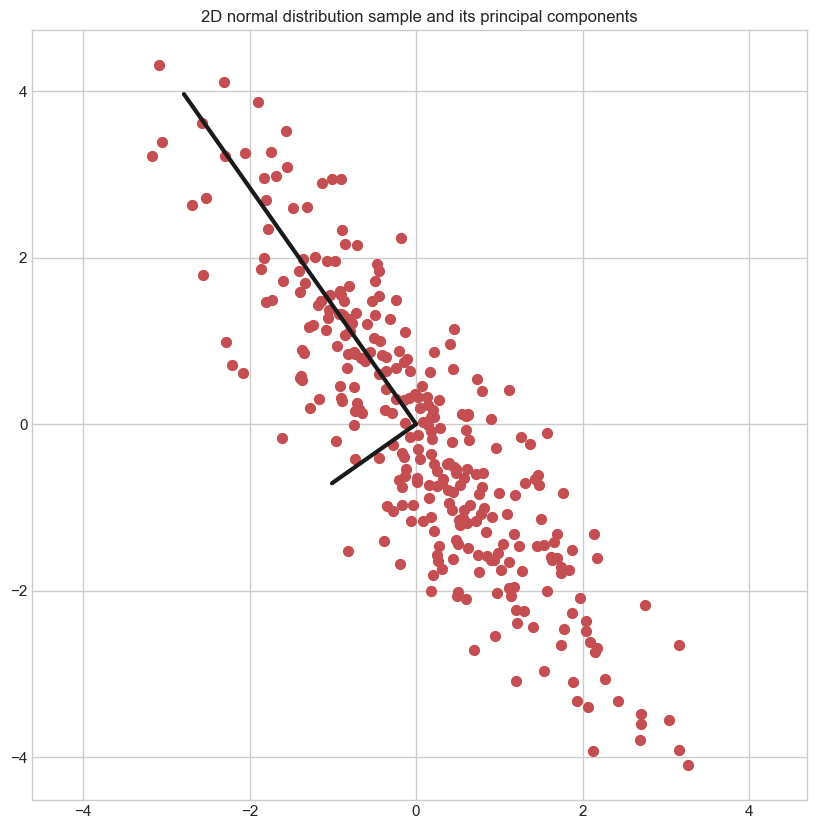

In [15]:
np.random.seed(0)
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, -1.0], 
                [-2.0, 3.0]])
X = np.random.multivariate_normal(mean, cov, 300)

pca = PCA()
pca.fit(X)
print('Proportion of variance explained by each component:\n' +\
      '1st component - %.2f,\n2nd component - %.2f\n' %
      tuple(pca.explained_variance_ratio_))
print('Directions of principal components:\n' +\
      '1st component:', pca.components_[0],
      '\n2nd component:', pca.components_[1])

plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=50, c='r')
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
plt.axis('equal')
plt.title('2D normal distribution sample and its principal components')
plt.show()

Первая главная компонента (ей соответствует более длинный вектор) объясняет более 90% дисперсии исходных данных. Это говорит о том, что она содержит в себе почти всю информацию о расположении выборки в пространстве, и вторая компонента может быть опущена. Спроецируем данные на первую компоненту.

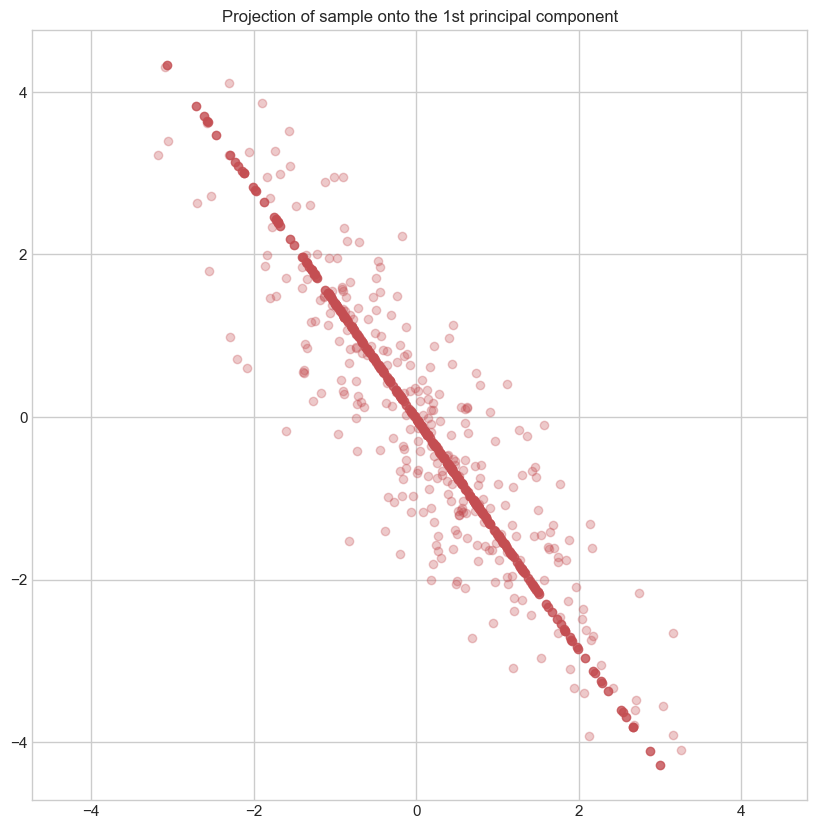

In [17]:
# Keep enough components to explain 90% of variance
pca = PCA(0.90)
X_reduced = pca.fit_transform(X)

# Map the reduced data into the initial feature space
X_new = pca.inverse_transform(X_reduced)

plt.figure(figsize=(10,10))
plt.plot(X[:, 0], X[:, 1], 'or', alpha=0.3)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.8)
plt.axis('equal')
plt.title('Projection of sample onto the 1st principal component')
plt.show()

Мы понизили размерность данных вдвое, при этом сохранив наиболее значимые черты. В этом заключается основной принцип понижения размерности – приблизить многомерный набор данных с помощью данных меньшей размерности, сохранив при этом как можно больше информации об исходных данных.

### Визуализация многомерных данных

Одним из применений метода главных компонент является визуализации многомерных данных в двухмерном (или трехмерном) пространстве. Для этого необходимо взять первые две главных компоненты и спроецировать данные на них. При этом, если признаки имеют различную природу, их следует отмасштабировать. Основные способы масштабирования:

* На единичную дисперсию по осям (масштабы по осям равны средним квадратичным отклонениям — после этого преобразования ковариационная матрица совпадает с матрицей коэффициентов корреляции).
* На равную точность измерения (масштаб по оси пропорционален точности измерения данной величины).
* На равные требования в задаче (масштаб по оси определяется требуемой точностью прогноза данной величины или допустимым её искажением — уровнем толерантности).

#### Примеры c набором данных Iris

Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


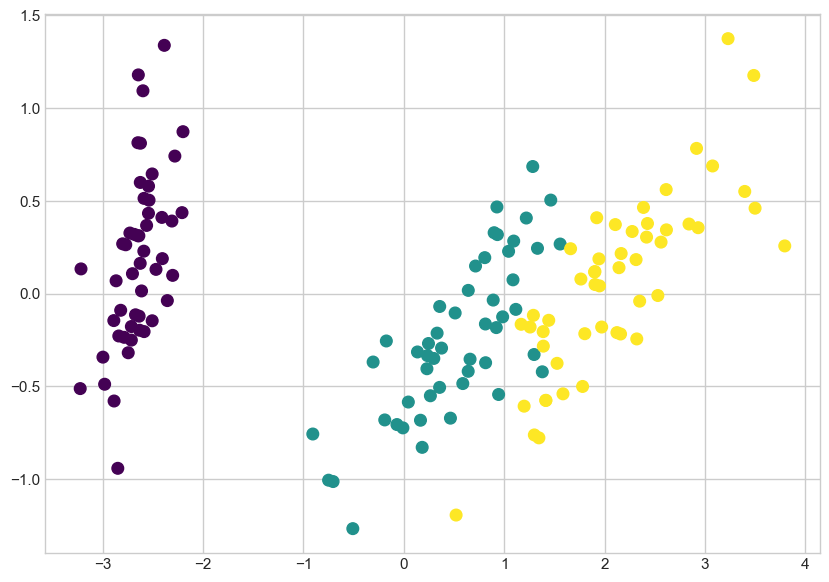

In [20]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, cmap='viridis')
plt.show()

#### Примеры c набором данных Digits

Рассмотрим применение метода главных компонент для визуализации данных из набора изображений рукописных цифр.

Projecting 64-dimensional data to 2D


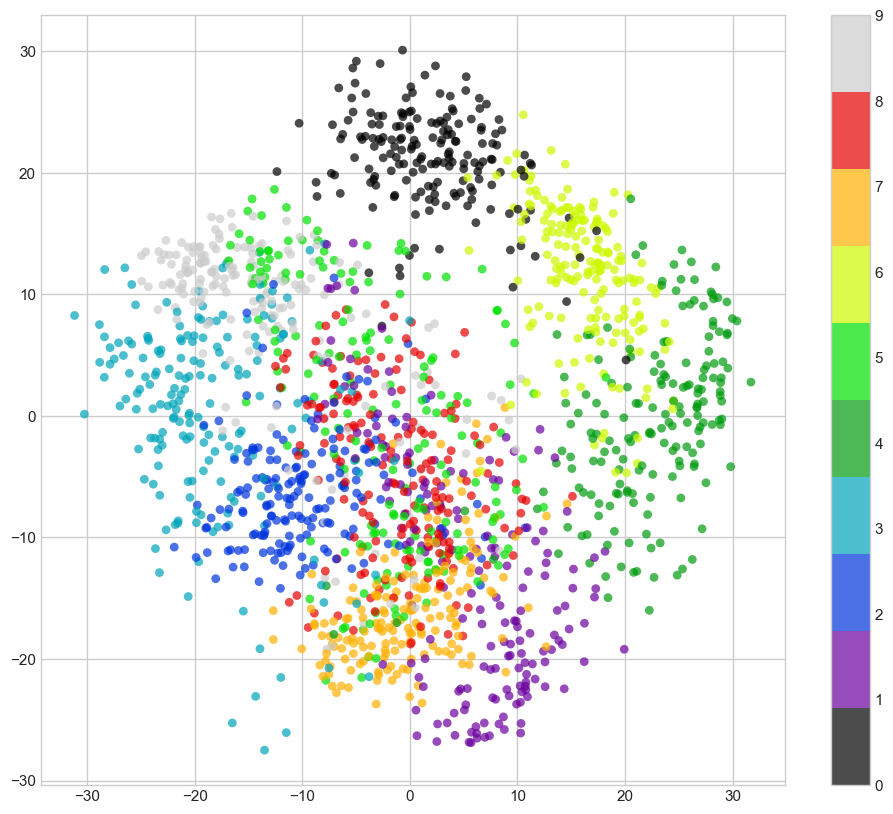

In [21]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

Полученная картинка позволяет увидеть зависимости между различными цифрами. Например, цифры 0 и 6 располагаются в соседних кластерах, что говорит об их схожем написании. Наиболее "разбросанный" (по другим кластерам) – это кластер, соответствующий цифре 8, что говорит о том, что она имеет много различных написаний, делающих её схожей со многими другими цифрами.

Посмотрим, как выглядят первые две главные компоненты.

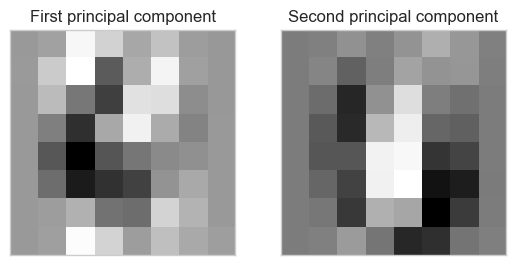

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

im = pca.components_[0]
ax1.imshow(im.reshape((8, 8)), cmap='binary')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('First principal component')

im = pca.components_[1]
ax2.imshow(im.reshape((8, 8)), cmap='binary')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Second principal component')
plt.show()

### Сжатие данных
Другим применением PCA является снижение размерности данных для их сжатия. Рассмотрим, как влияет число отбираемых главных компонент (на которые осуществляется проекция) на качество восстановления исходного изображения.

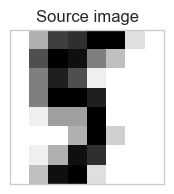

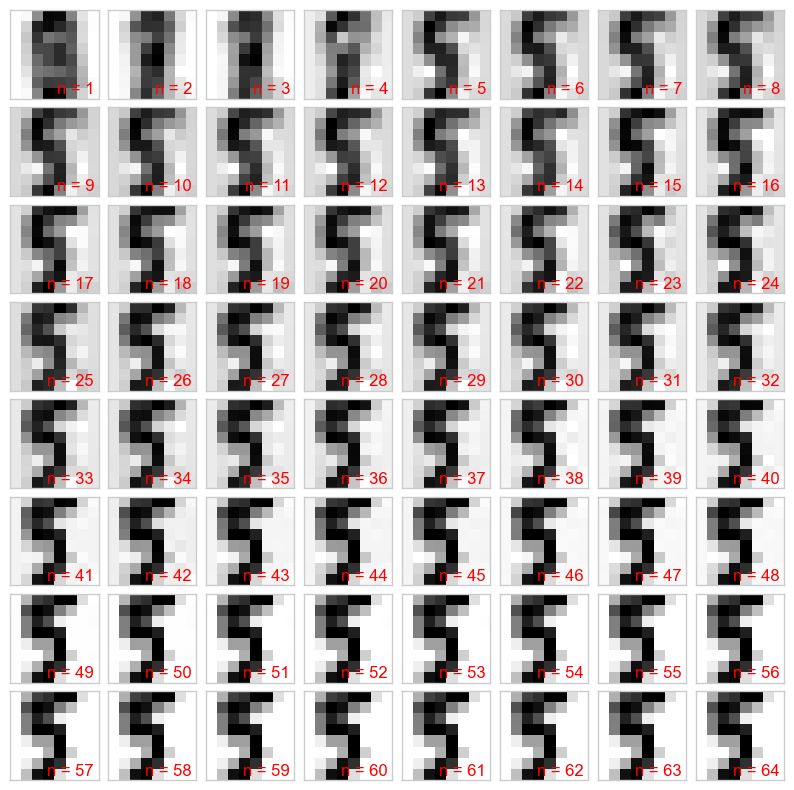

In [23]:
plt.figure(figsize=(4,2))
plt.imshow(X[15].reshape((8, 8)), cmap='binary')
plt.xticks([])
plt.yticks([])
plt.title('Source image')
plt.show()

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[15].reshape(1, -1)))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='red')
    ax.set_xticks([])
    ax.set_yticks([])

Как понять, какое число главных компонент достаточно оставить? Для этого может оказаться полезным следующий график, выражающий зависимость общей доли объясняемой дисперсии от числа главных компонент.

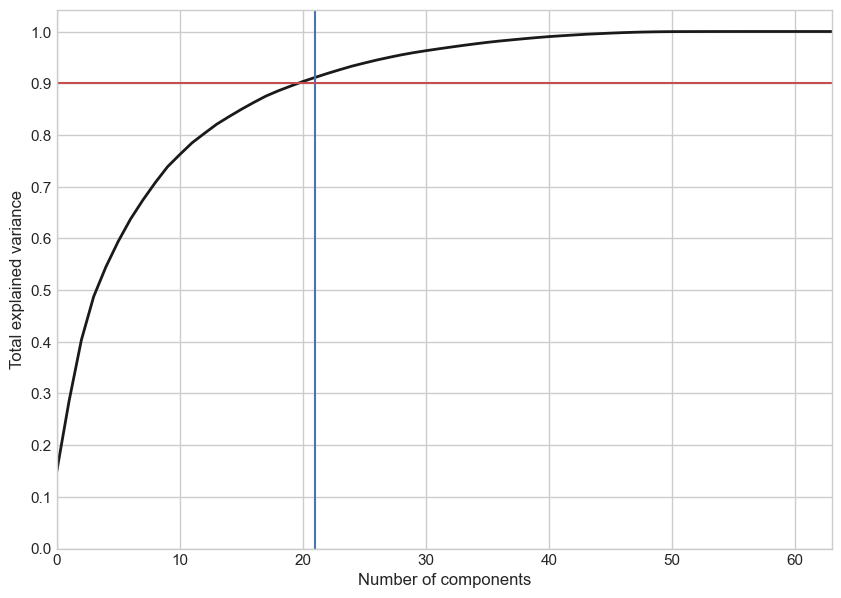

In [24]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show()

In [25]:
pca = PCA(0.9).fit(X)
print('We need %d components to explain 90%% of variance' 
      % pca.n_components_)

We need 21 components to explain 90% of variance


### Предобработка данных
Метод главных компонент часто используется для предварительной обработки данных перед обучением классификатора. В качестве примера такого применения рассмотрим задачу о распознавании лиц.

Для начала посмотрим на исходные данные.

In [26]:
%%time
from sklearn import datasets
from sklearn.model_selection import train_test_split

lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, 
                resize=0.4, data_home='../../data/faces')

print('%d objects, %d features, %d classes' % (lfw_people.data.shape[0],
      lfw_people.data.shape[1], len(lfw_people.target_names)))
print('\nPersons:')
for name in lfw_people.target_names:
    print(name)

1560 objects, 1850 features, 12 classes

Persons:
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair
CPU times: user 6.36 s, sys: 8.94 s, total: 15.3 s
Wall time: 17min 48s


Распределение целевого класса:

In [28]:
for i, name in enumerate(lfw_people.target_names):
    print("{}: {} photos.".format(name, (lfw_people.target == i).sum()))

Ariel Sharon: 77 photos.
Colin Powell: 236 photos.
Donald Rumsfeld: 121 photos.
George W Bush: 530 photos.
Gerhard Schroeder: 109 photos.
Hugo Chavez: 71 photos.
Jacques Chirac: 52 photos.
Jean Chretien: 55 photos.
John Ashcroft: 53 photos.
Junichiro Koizumi: 60 photos.
Serena Williams: 52 photos.
Tony Blair: 144 photos.


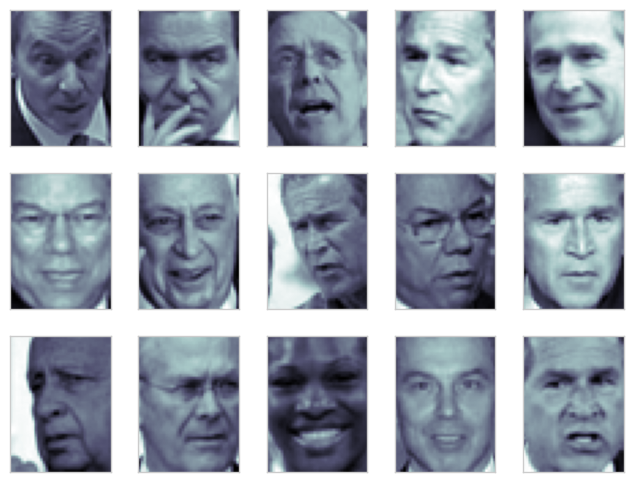

In [29]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='bone')

In [30]:
X_train, X_test, y_train, y_test = \
    train_test_split(lfw_people.data, lfw_people.target, random_state=0)

print('Train size:', X_train.shape[0], 'Test size:', X_test.shape[0])

Train size: 1170 Test size: 390


Вместо обычного PCA воспользуемся его приближенной версией (randomized PCA), которая позволяет существенно ускорить работу алгоритма на больших наборах данных. Выделим 100 главных компонент. Как видно, они объясняют более 90% дисперсии исходных данных.

100 principal components explain 91.49% of variance


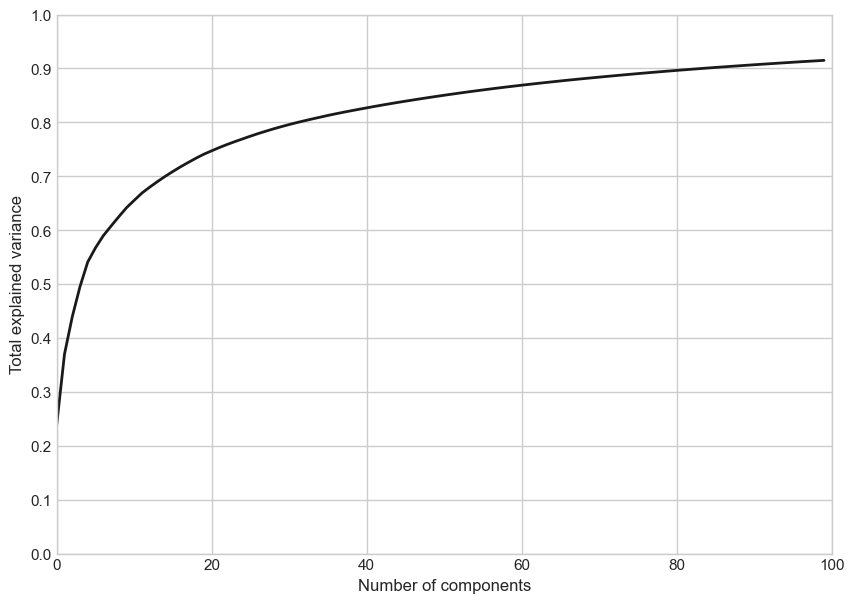

In [31]:
pca = PCA(n_components=100, svd_solver='randomized')
pca.fit(X_train)

print('100 principal components explain %.2f%% of variance' %
      (100 * np.cumsum(pca.explained_variance_ratio_)[-1]))
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=2, color='k')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

Посмотрим на главные компоненты (или главные "лица"). Видим, что первые главные компоненты несут в себе информацию в основном об освещении на фотографии, в то время как оставшиеся выделяют какие-то отдельные черты человеческого лица - глаза, брови и другие.

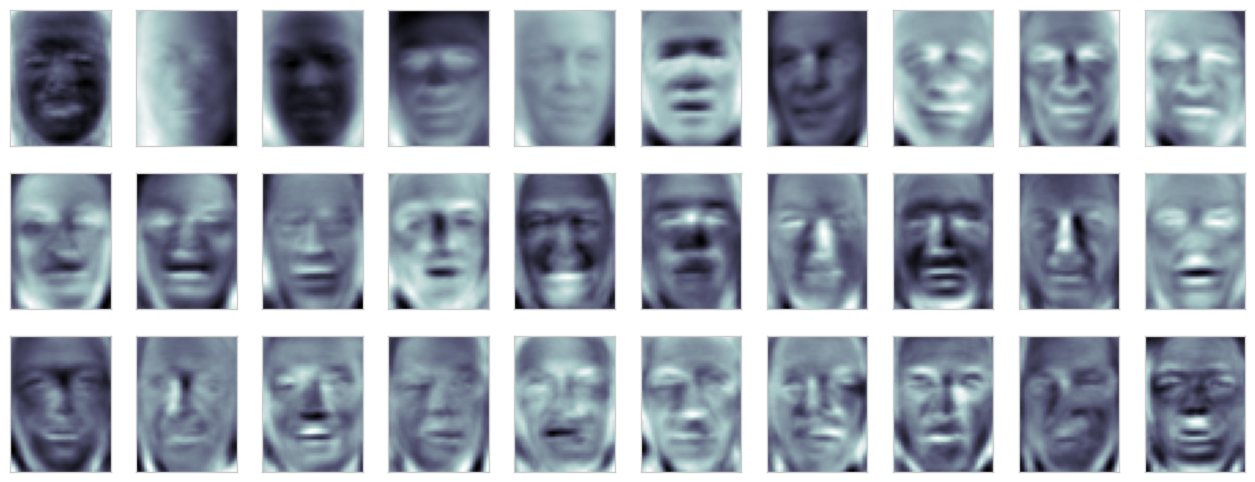

In [32]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap='bone')

PCA позволяет посмотреть на "среднее" лицо – тут считается среднее по каждому новому признаку.

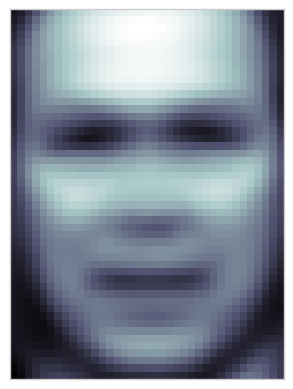

In [33]:
plt.imshow(pca.mean_.reshape((50, 37)), cmap='bone')
plt.xticks([])
plt.yticks([])
plt.show()

Перейдем теперь непосредственно к классификации. Мы сократили размерность данных (с 1850 признаков до 100), что позволяет существенно ускорить работу стандартных алгоритмов обучения. Настроим SVM с RBF-ядром и посмотрим на результаты классификации.

In [34]:
%%time
from sklearn.svm import LinearSVC

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = LinearSVC(random_state=17).fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

CPU times: user 1.91 s, sys: 1.4 s, total: 3.31 s
Wall time: 711 ms


Accuracy: 0.769231
                   precision    recall  f1-score   support

     Ariel Sharon       0.58      0.73      0.65        15
     Colin Powell       0.85      0.77      0.81        65
  Donald Rumsfeld       0.53      0.55      0.54        29
    George W Bush       0.84      0.92      0.88       133
Gerhard Schroeder       0.72      0.64      0.68        33
      Hugo Chavez       0.69      0.69      0.69        16
   Jacques Chirac       0.80      0.33      0.47        12
    Jean Chretien       0.75      0.60      0.67        10
    John Ashcroft       0.91      0.56      0.69        18
Junichiro Koizumi       0.56      0.91      0.69        11
  Serena Williams       1.00      0.79      0.88        19
       Tony Blair       0.68      0.79      0.73        29

         accuracy                           0.77       390
        macro avg       0.74      0.69      0.70       390
     weighted avg       0.78      0.77      0.77       390



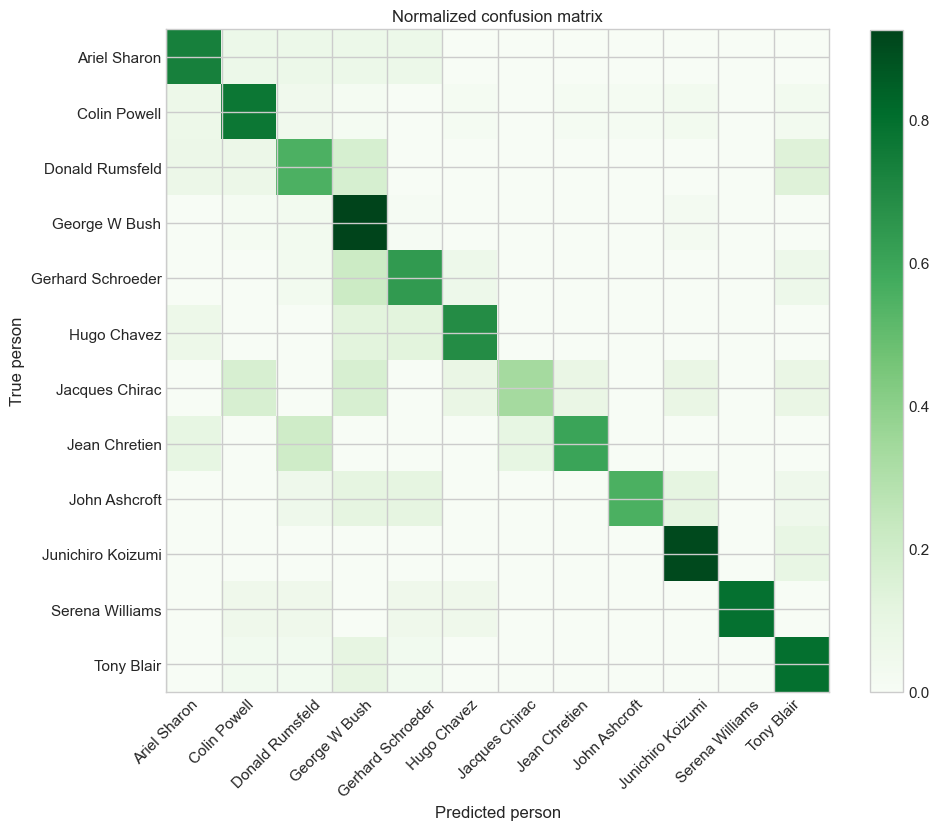

In [35]:
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)

print("Accuracy: %f" % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

M = confusion_matrix(y_test, y_pred)
M_normalized = M.astype('float') / M.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
im = plt.imshow(M_normalized, interpolation='nearest', cmap='Greens')
plt.colorbar(im, shrink=0.71)
tick_marks = np.arange(len(lfw_people.target_names))
plt.xticks(tick_marks - 0.5, lfw_people.target_names, rotation=45)
plt.yticks(tick_marks, lfw_people.target_names)
plt.tight_layout()
plt.ylabel('True person')
plt.xlabel('Predicted person')
plt.title('Normalized confusion matrix')
plt.show()

### Наконец пример с датасетом wine

In [10]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [11]:
X_train[:10]

array([[-2.179, -1.072],
       [-1.808,  1.578],
       [ 1.098,  2.221],
       [-2.556, -1.662],
       [ 1.857,  0.242],
       [ 2.583, -1.377],
       [ 0.873,  2.256],
       [-0.418,  2.354],
       [-0.305,  2.277],
       [ 2.141, -1.101]])

In [12]:
X_test[:10]

array([[ 2.207, -1.029],
       [-2.537, -1.836],
       [ 2.192,  1.812],
       [ 2.515, -1.389],
       [-0.348,  0.525],
       [ 1.442, -0.29 ],
       [ 2.119, -1.63 ],
       [-3.06 , -0.671],
       [-0.235,  2.168],
       [-1.212,  2.122]])

In [21]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [22]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

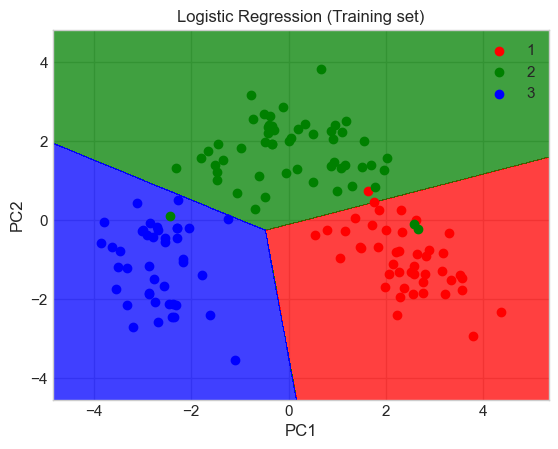

In [23]:
# train set
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

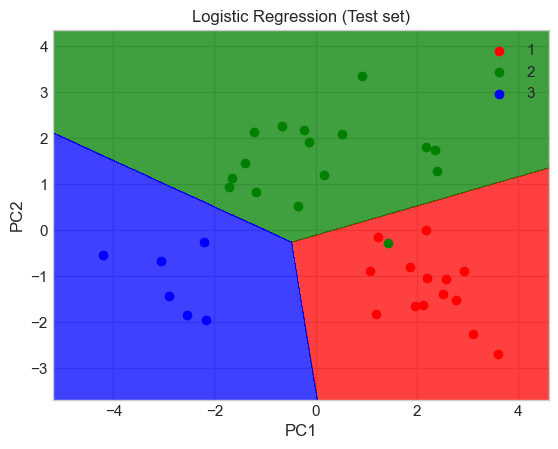

In [24]:
# test set
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Kernel PCA

Kernel PCA (Kernel Principal Component Analysis) - это расширение метода Principal Component Analysis (PCA), которое позволяет выполнять анализ данных в высокоразмерных пространствах, используя ядерные функции. Kernel PCA позволяет обрабатывать данные, которые не могут быть линейно разделены в исходном признаковом пространстве, что делает его мощным инструментом для нелинейной размерности и снижения размерности данных.

Вот основные идеи и шаги Kernel PCA:

1. **Функция ядра:** В Kernel PCA используется функция ядра (kernel function), такая как полиномиальная, радиальная базисная функция (RBF, или гауссова), сигмоидальная и другие. Функция ядра позволяет проецировать данные в пространство более высокой размерности, где они могут быть более линейно разделены.

2. **Вычисление матрицы ядра:** Для каждой пары точек данных вычисляется значение функции ядра, и результаты собираются в матрицу ядра (kernel matrix). Эта матрица показывает сходство между точками данных в пространстве ядра.

3. **Центрирование данных в пространстве ядра:** Как и в обычной PCA, данные центрируются в пространстве ядра путем вычитания среднего значения.

4. **Вычисление собственных векторов:** Затем вычисляются собственные векторы и собственные значения матрицы ядра. Эти собственные векторы представляют собой главные компоненты в пространстве ядра.

5. **Проекция на главные компоненты:** Данные проецируются на главные компоненты в пространстве ядра, и размерность данных уменьшается, сохраняя структурную информацию.

Kernel PCA полезен в следующих случаях:

1. **Нелинейные данные:** Kernel PCA позволяет снижать размерность данных и извлекать главные компоненты в пространствах с нелинейной структурой данных.

2. **Выделение нелинейных паттернов:** Kernel PCA может помочь выделить нелинейные паттерны и отношения между признаками данных, что может быть полезно для обнаружения скрытых зависимостей.

3. **Улучшение разделения классов:** Если классы данных не могут быть линейно разделены в исходном пространстве, Kernel PCA может помочь улучшить их разделение.

Однако Kernel PCA имеет свои параметры, такие как выбор ядра и настройка гиперпараметров, которые нужно настраивать аккуратно для достижения оптимальных результатов. Также он может быть более вычислительно затратным по сравнению с обычным PCA, особенно в высокоразмерных пространствах.

In [12]:
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [13]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [14]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

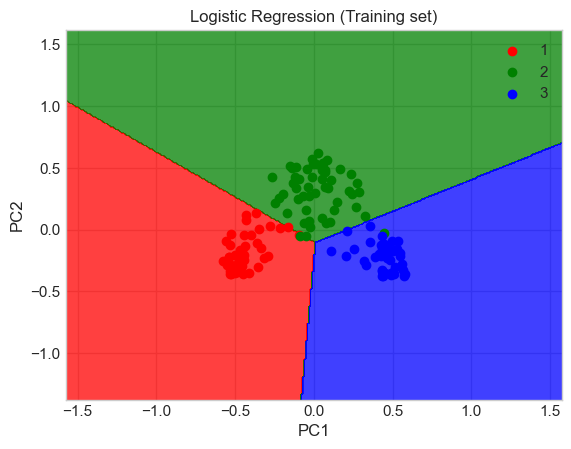

In [15]:
# train set
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

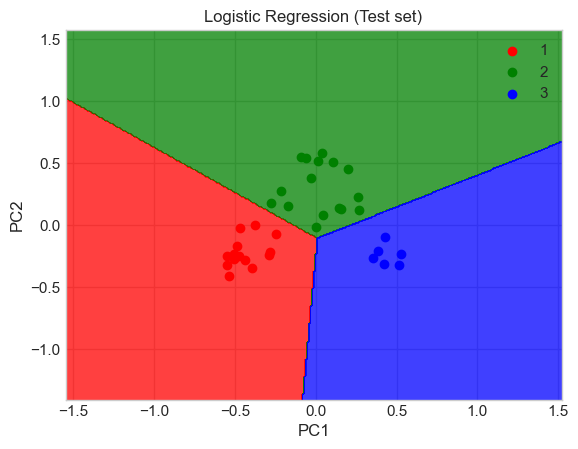

In [16]:
# test set
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Linear Discriminant Analysis

LDA (Linear Discriminant Analysis) - это метод статистической классификации и снижения размерности данных. Он позволяет находить линейные комбинации признаков (дискриминанты), которые наилучшим образом разделяют разные классы данных, в то время как минимизируется разброс (разброс внутри класса). В результате, LDA может использоваться для классификации и снижения размерности данных, учитывая информацию о классах.

Вот основные идеи и шаги метода LDA:

1. **Центрирование данных:** Сначала данные центрируются, вычитая среднее значение каждого признака из всех точек данных. Это делается для того, чтобы убрать смещение и обеспечить нулевое среднее для каждого признака.

2. **Вычисление матрицы разброса классов:** LDA вычисляет матрицу разброса между классами (between-class scatter matrix), которая описывает различия между классами данных.

3. **Вычисление матрицы разброса внутри классов:** Затем вычисляется матрицу разброса внутри классов (within-class scatter matrix), которая измеряет разброс данных внутри каждого класса.

4. **Расчет собственных векторов и собственных значений:** Далее находятся собственные векторы и собственные значения, связанные с обратной матрицей between-class scatter matrix умноженной на within-class scatter matrix. Эти собственные векторы представляют собой линейные дискриминанты, которые оптимизируют разделение классов.

5. **Сортировка дискриминант:** Собственные векторы (дискриминанты) упорядочиваются по убыванию собственных значений, и выбираются первые k дискриминант, где k - количество классов минус один (k = c - 1, где c - количество классов).

6. **Проекция данных на дискриминанты:** Данные проецируются на пространство, образованное первыми k дискриминантами. Это позволяет снизить размерность данных и выполнить классификацию в новом пространстве, где максимизируется разделение классов.

Применение LDA может быть полезно в следующих случаях:

1. **Классификация:** LDA может использоваться для классификации данных, основываясь на информации о классах.

2. **Снижение размерности:** LDA позволяет сократить размерность данных, учитывая структуру классов и максимизируя разделение между классами.

3. **Улучшение разделения классов:** LDA помогает выделить наиболее информативные признаки, которые учитывают различия между классами.

4. **Уменьшение мультиколлинеарности:** LDA может быть полезен для уменьшения мультиколлинеарности признаков.

5. **Улучшение визуализации:** LDA позволяет визуализировать данные, уменьшив их размерность до двух или трех компонент.

Однако важно отметить, что LDA предполагает, что данные распределены нормально, и он чувствителен к выбросам. Также LDA требует, чтобы число признаков было меньше числа наблюдений, иначе матрица разброса внутри классов может быть вырожденной. Если эти условия не выполняются, LDA может давать менее точные результаты.

In [10]:
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [11]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [12]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

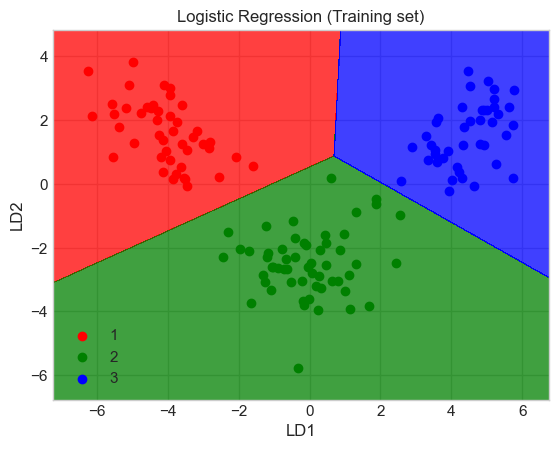

In [13]:
# train set
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

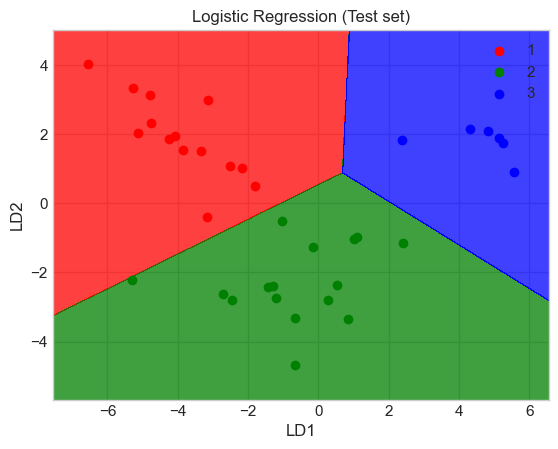

In [14]:
# test set
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

# Clustering
## K-means

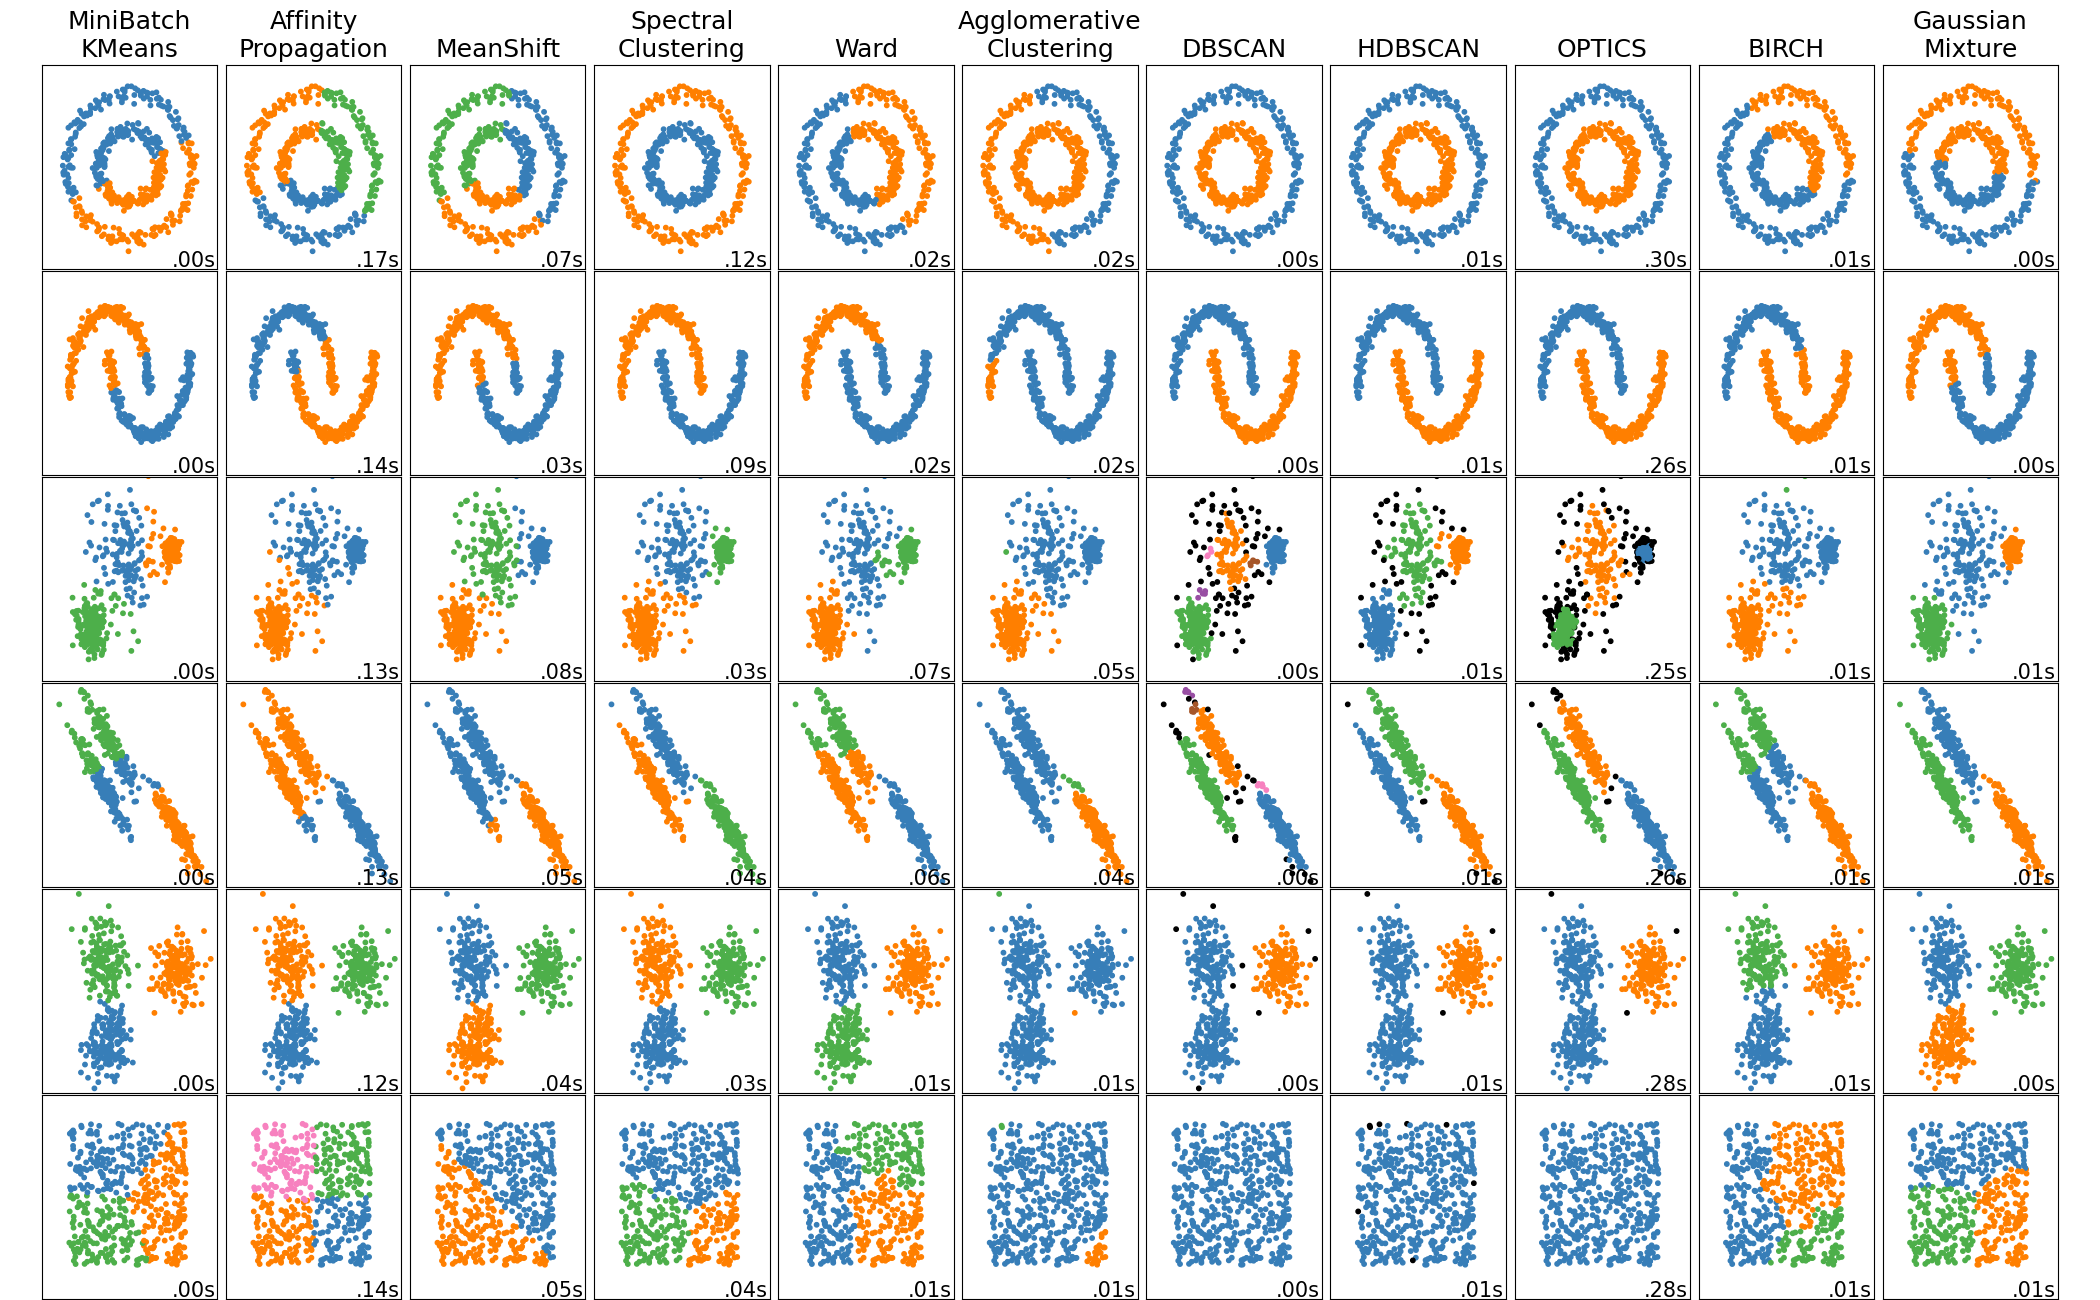

K-средних (K-means) - это один из наиболее популярных алгоритмов кластеризации, который позволяет разделить набор данных на K кластеров. Каждый кластер состоит из точек данных, близких друг к другу в пространстве признаков. K-средних является примером неконтролируемого обучения, так как алгоритм не требует размеченных данных и обучается путем разделения данных на кластеры на основе их сходства.

Вот основные шаги и характеристики K-средних:

1. **Инициализация центров кластеров:** Сначала выбираются K центров кластеров. Эти центры могут быть выбраны случайным образом из данных или с использованием других методов инициализации.

2. **Назначение точек кластерам:** Каждая точка данных назначается к ближайшему центру кластера на основе их расстояния в пространстве признаков. Это создает начальное разбиение данных на K кластеров.

3. **Пересчет центров кластеров:** После назначения точек кластерам, центры каждого кластера пересчитываются как среднее значение всех точек в этом кластере. Это обновление центров кластеров.

4. **Повторение:** Шаги 2 и 3 повторяются до тех пор, пока критерий остановки не будет выполнен. Критерии остановки могут включать максимальное количество итераций или сходимость алгоритма.

5. **Критерии остановки:** K-средних может завершиться, если не происходит изменений в назначении точек кластерам или если достигнуто максимальное количество итераций.

Применение K-средних может быть полезно в следующих случаях:

1. **Сегментация данных:** K-средних позволяет сегментировать данные на кластеры схожих точек, что может быть полезно, например, для анализа покупательского поведения.

2. **Сжатие данных:** K-средних может быть использован для сжатия данных, заменяя точки данных центрами кластеров.

3. **Инициализация других алгоритмов:** K-средних может быть использован для инициализации центров кластеров для более сложных алгоритмов кластеризации, таких как иерархическая кластеризация.

4. **Фильтрация шума:** K-средних может быть использован для выявления и фильтрации шумовых точек данных, не принадлежащих ни одному кластеру.

Однако K-средних также имеет свои ограничения, такие как чувствительность к начальной инициализации центров кластеров и неспособность обнаруживать кластеры произвольной формы или кластеры с разной плотностью данных. В некоторых случаях, более сложные методы кластеризации, такие как DBSCAN или агломеративная кластеризация, могут быть более подходящими выборами.

### Метрики

<b>Евклидово расстояние.</b>  Геометрическое расстояние в многомерном пространстве, вычисляется следующим образом:
$$\rho(x,y) = \sqrt{\sum\limits_i (x_i - y_i)^2}$$

<b>Квадрат евклидова расстояния.</b>  Для придания большего веса более отдаленным друг от друга объектам:
$$\rho(x,y) = \sum\limits_i (x_i - y_i)^2$$
    
<b>Расстояние городских кварталов (манхэттенское расстояние).</b> Это расстояние является просто средним разностей по координатам. В большинстве случаев эта мера расстояния приводит к таким же результатам, как и для обычного расстояния Евклида. Однако отметим, что для этой меры влияние отдельных больших разностей (выбросов) уменьшается (так как они не возводятся в квадрат). Манхэттенское расстояние вычисляется по формуле:
$$\rho(x,y) = \sum\limits_i |x_i - y_i|$$
    
<b>Расстояние Чебышева.</b> Это расстояние может оказаться полезным, когда желают определить два объекта как "различные", если они различаются по какой-либо одной координате (каким-либо одним измерением). Расстояние Чебышева вычисляется по формуле:
$$\rho(x,y) = \max\limits_i |x_i - y_i|$$
    
<b>Степенное расстояние.</b> Иногда желают прогрессивно увеличить или уменьшить вес, относящийся к размерности, для которой соответствующие объекты сильно отличаются. Это может быть достигнуто с использованием степенного расстояния. Степенное расстояние вычисляется по формуле:
$$\rho(x,y) = \left( \sum\limits_i |x_i - y_i|^p \right)^{1/p}$$

### Инициализация центроидов
Метод `sklearn.KMeans` содержит параметры `n_init` (число запусков из различных начальных приближений) и `init`. Есть три способа инициализации центроидов:

* `k-means++` – "умная" инициализация центроидов для ускорения сходимости.
* `random` – случайная инициализация центроидов.
* `ndarray` – заданная инициализация центроидов.

## Простой пример

In [4]:
dataset = pd.read_csv('/Users/amirmukhamedzhan/Yandex.Disk.localized/Документы/KFU/ML/ML_FALL_2023/data/Mall_Customers.csv')
dataset

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [5]:
X = dataset.iloc[:, [3, 4]].values

In [6]:
X.shape

(200, 2)

### Использование elbow method (метод локтя) для поиска для оптимального числа кластеров

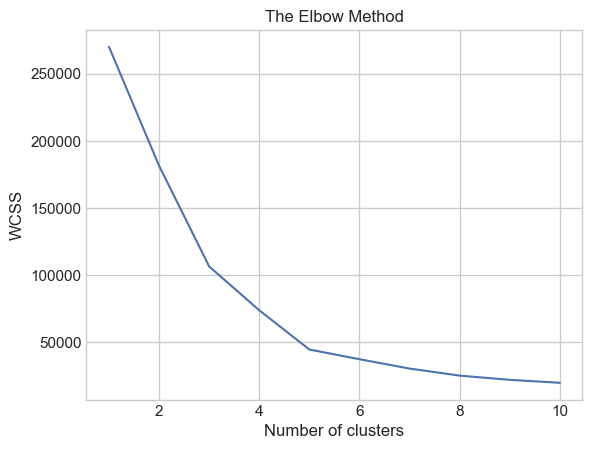

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Обучение модели K-means

In [8]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [9]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [10]:
y_kmeans.shape

(200,)

### Визуализация кластеров

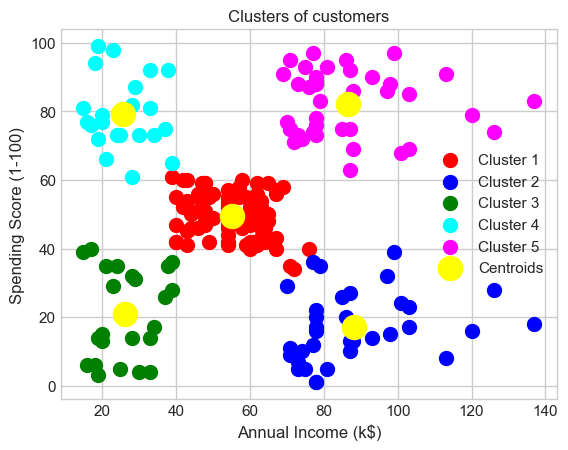

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Еще один пример простой с игроками NBA
[Признаки](https://www.databasebasketball.com/about/aboutstats.htm) игроков.

In [47]:
nba = pd.read_csv("../../data/nba_2013.csv")
nba.head(3)

player pos  age bref_team_id   g  gs    mp   fg  fga    fg.  x3p  \
0    Quincy Acy  SF   23          TOT  63   0   847   66  141  0.468    4   
1  Steven Adams   C   20          OKC  81  20  1197   93  185  0.503    0   
2   Jeff Adrien  PF   27          TOT  53  12   961  143  275  0.520    0   

   x3pa      x3p.  x2p  x2pa      x2p.   efg.  ft  fta    ft.  orb  drb  trb  \
0    15  0.266667   62   126  0.492063  0.482  35   53  0.660   72  144  216   
1     0       NaN   93   185  0.502703  0.503  79  136  0.581  142  190  332   
2     0       NaN  143   275  0.520000  0.520  76  119  0.639  102  204  306   

   ast  stl  blk  tov   pf  pts     season  season_end  
0   28   23   26   30  122  171  2013-2014        2013  
1   43   40   57   71  203  265  2013-2014        2013  
2   38   24   36   39  108  362  2013-2014        2013

In [49]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

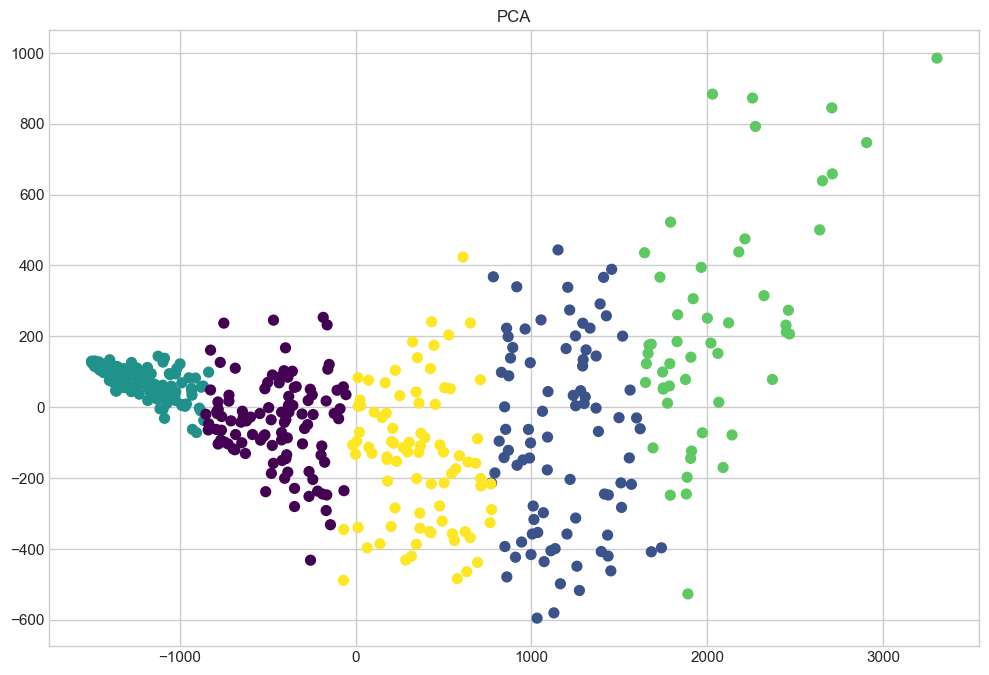

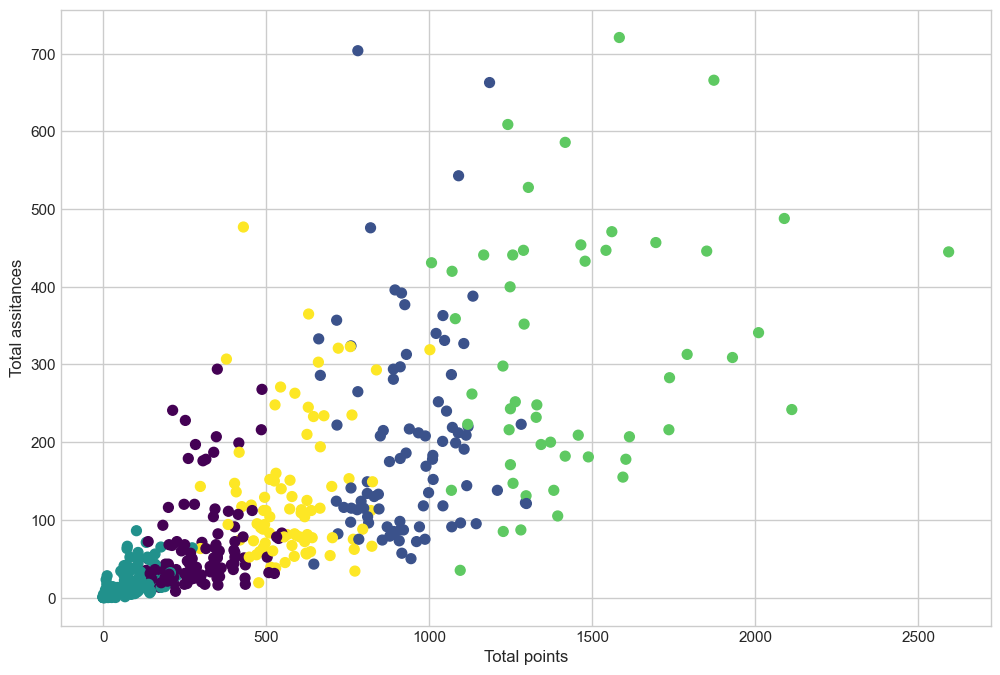

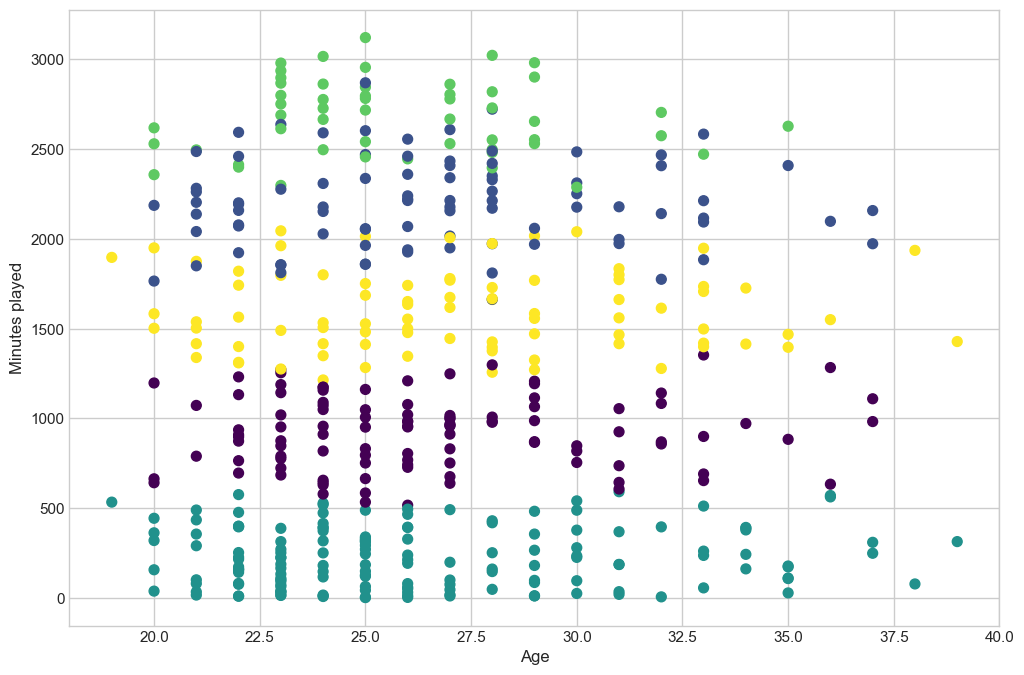

In [50]:
kmeans = KMeans(n_clusters=5, random_state=1)
numeric_cols = nba._get_numeric_data().dropna(axis=1)
kmeans.fit(numeric_cols)


# Visualizing using PCA
pca = PCA(n_components=2)
res = pca.fit_transform(numeric_cols)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA')

# Visualizing using 2 features: Total points vs. Total assists
plt.figure(figsize=(12,8))
plt.scatter(nba['pts'], nba['ast'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Total points')
plt.ylabel('Total assitances')

# Visualizing using 2 features: Age vs. Minutes played
plt.figure(figsize=(12,8))
plt.scatter(nba['age'], nba['mp'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Minutes played');

### Сжатие изображений с K-means

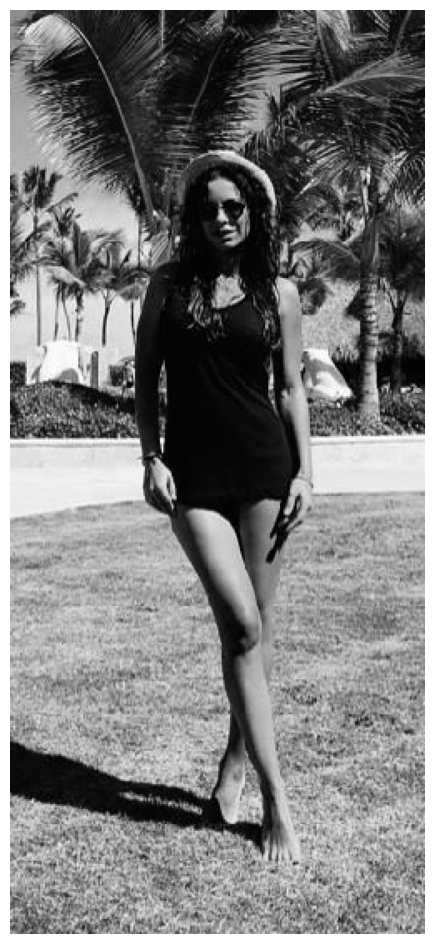

In [36]:
import matplotlib.image as mpimg

img = mpimg.imread('/Users/amirmukhamedzhan/Yandex.Disk.localized/Документы/KFU/ML/ML_FALL_2023/data/woman.jpg')[..., 1]
plt.figure(figsize = (20, 12))
plt.axis('off')
plt.imshow(img, cmap='gray');

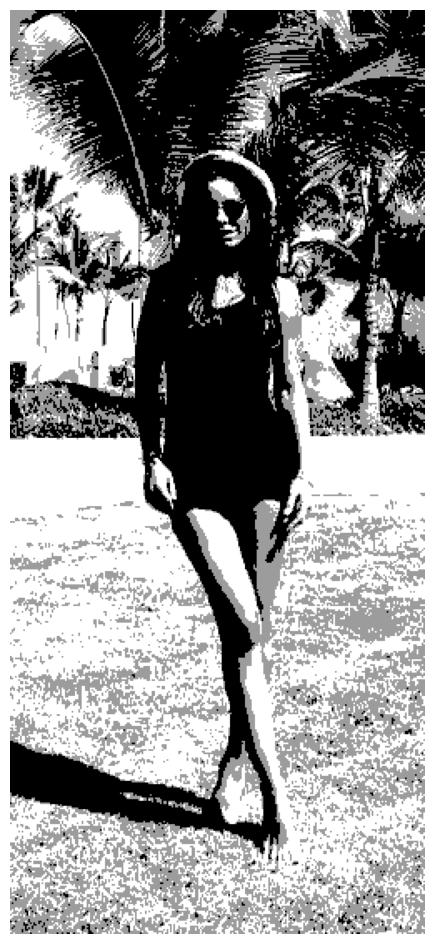

In [37]:
from scipy.stats import randint
from sklearn.cluster import MiniBatchKMeans

X = img.reshape((-1, 1))
k_means = MiniBatchKMeans(n_clusters=3)
k_means.fit(X) 
values = k_means.cluster_centers_
labels = k_means.labels_
img_compressed = values[labels].reshape(img.shape)
plt.figure(figsize = (20, 12))
plt.axis('off')
plt.imshow(img_compressed, cmap = 'gray');

### Еще пример с цветным изображением

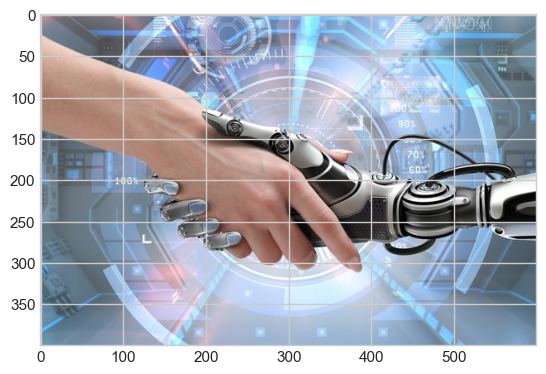

(400, 600, 3)
[[[218 149 167]
  [215 146 164]
  [211 144 161]
  ...
  [117 146 162]
  [116 145 161]
  [116 145 161]]

 [[215 148 165]
  [212 145 162]
  [207 143 159]
  ...
  [116 145 161]
  [116 145 161]
  [116 145 161]]

 [[209 147 162]
  [206 144 159]
  [202 141 156]
  ...
  [114 143 159]
  [114 143 159]
  [114 143 159]]

 ...

 [[104 146 171]
  [103 147 172]
  [105 149 174]
  ...
  [115 146 174]
  [115 146 174]
  [115 146 174]]

 [[106 145 174]
  [107 146 175]
  [109 148 177]
  ...
  [115 146 174]
  [116 147 175]
  [116 147 175]]

 [[109 144 174]
  [109 146 175]
  [111 148 177]
  ...
  [116 147 175]
  [116 147 175]
  [117 148 176]]]


In [2]:
#from matplotlib.image import imread
from skimage.io import imread

orig_img = imread('https://www.osp.ru/FileStorage/DOCUMENTS_ILLUSTRATIONS/13234504/original.jpg')
plt.imshow(orig_img)
plt.show()

print(orig_img.shape)
print(orig_img)

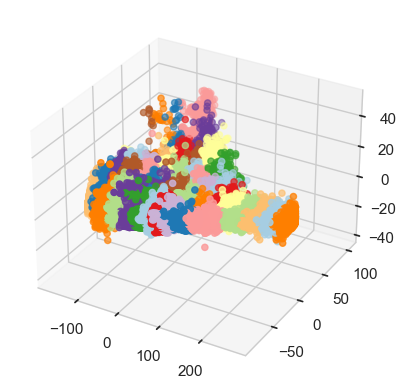

In [16]:
n_colors = 50

from sklearn.cluster import KMeans
X = orig_img.reshape((-1,orig_img.shape[-1]))
kmeans = KMeans(n_clusters=n_colors).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
#new_img = centroids[labels].reshape(orig_img.shape)  # for png
new_img = centroids[labels].astype(int).reshape(orig_img.shape)  # for jpg

# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter(X[:,0],X[:,1],X[:,2],c=labels,cmap=plt.cm.Paired)
# plt.show()

# Визуализация в 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap=plt.cm.Paired)
plt.show()

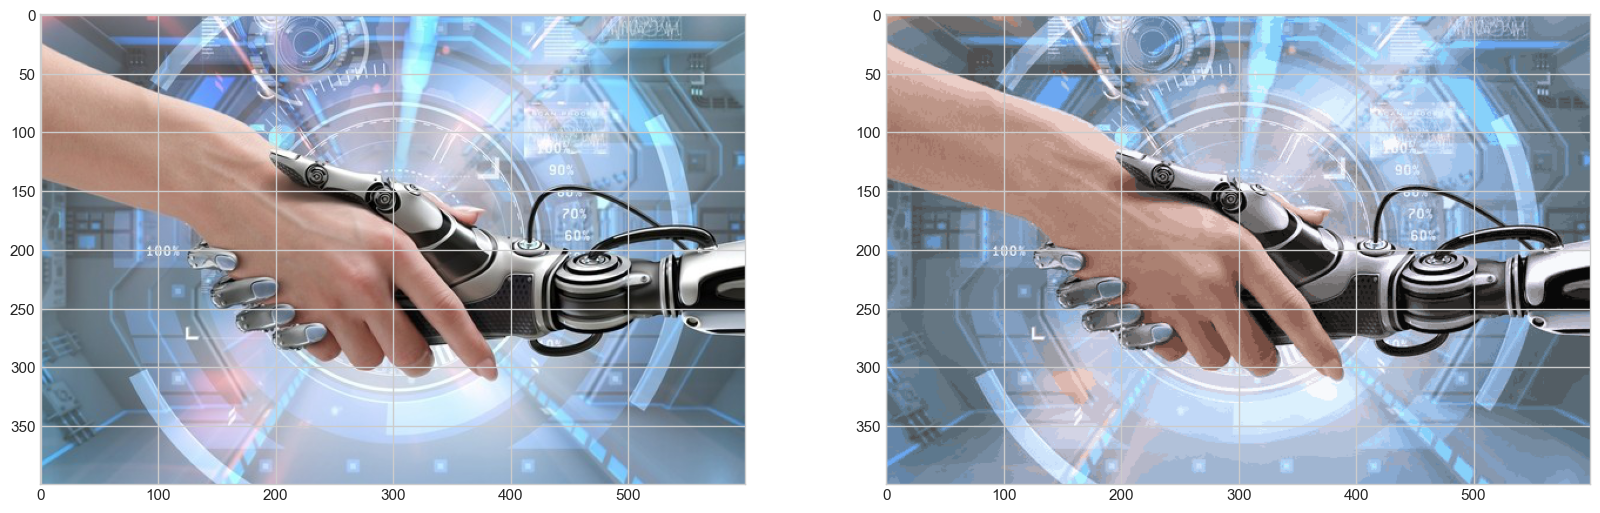

In [17]:
fig, axarr = plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(20,8))
axarr[0].imshow(orig_img)
axarr[1].imshow(new_img)
plt.show()

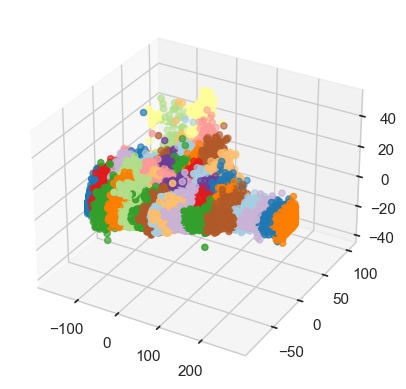

In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Предполагая, что orig_img содержит изображение
n_colors = 50
X = orig_img.reshape((-1, orig_img.shape[-1]))

# Снижение размерности с использованием PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Кластеризация с KMeans
kmeans = KMeans(n_clusters=n_colors).fit(X_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# new_img = centroids[labels].reshape(orig_img.shape)  # for png
# new_img = centroids[labels].astype(int).reshape(orig_img.shape)  # for jpg

# Визуализация в 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap=plt.cm.Paired)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


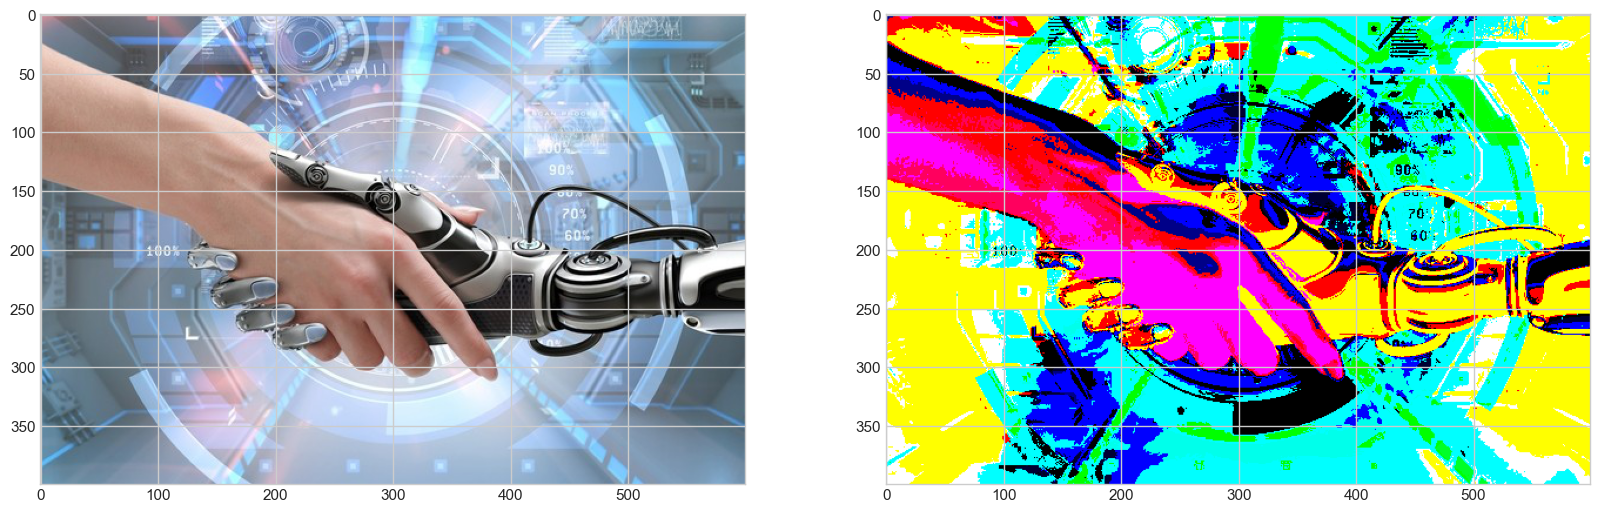

In [12]:
new_img = centroids[labels].reshape(orig_img.shape)
fig, axarr = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20, 8))
axarr[0].imshow(orig_img)
axarr[1].imshow(new_img)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


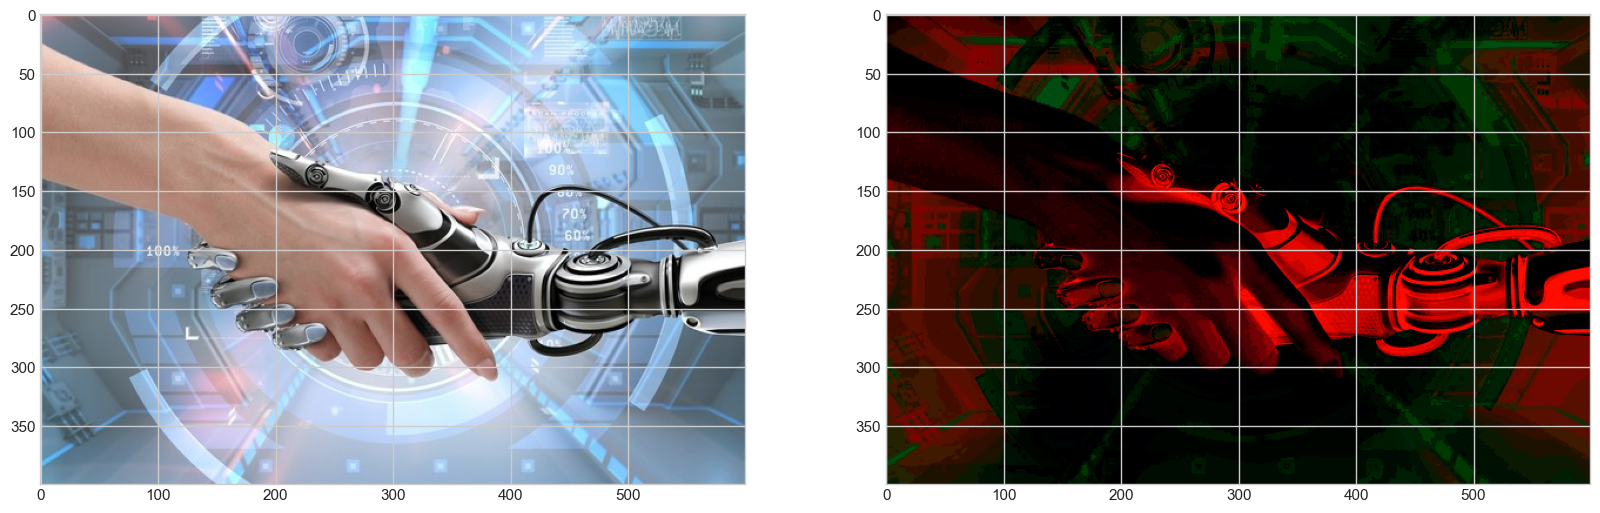

In [13]:
new_img = centroids[labels].astype(int).reshape(orig_img.shape)
fig, axarr = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20, 8))
axarr[0].imshow(orig_img)
axarr[1].imshow(new_img)
plt.show()

### Нахождение тем в текстах

In [38]:
# Применим KMeans для кластеризации текстов из 4 новостных категорий
from time import time

from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import Normalizer

categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space']

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

labels = dataset.target
true_k = np.unique(labels).shape[0]

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories


In [39]:
# Закодируем тексты с помощью TF-IDF признаков
print("Extracting features from the training dataset using a sparse vectorizer")
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english')

X = vectorizer.fit_transform(dataset.data)
print("n_samples: %d, n_features: %d" % X.shape)

Extracting features from the training dataset using a sparse vectorizer
n_samples: 3387, n_features: 1000


In [40]:
# И применим к получившимся векторам метод k-средних
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

Clustering sparse data with KMeans(max_iter=100, n_clusters=4, n_init=1)
Homogeneity: 0.462
Completeness: 0.477
V-measure: 0.469
Adjusted Rand-Index: 0.347
Silhouette Coefficient: 0.014


In [42]:
# Выведем слова, соответствующие самым весомым компонентам центров кластеров
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % (i + 1), end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 1: com article university posting cs don just host nntp like
Cluster 2: god sandvik com keith people jesus sgi morality livesey kent
Cluster 3: graphics image thanks university file 3d files ac help program
Cluster 4: space nasa access henry digex pat toronto gov alaska shuttle


### Кластеризация рукописных цифр

In [43]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target

In [44]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(n_clusters=10)

In [45]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, kmeans.predict(X))


0.6675622142226908

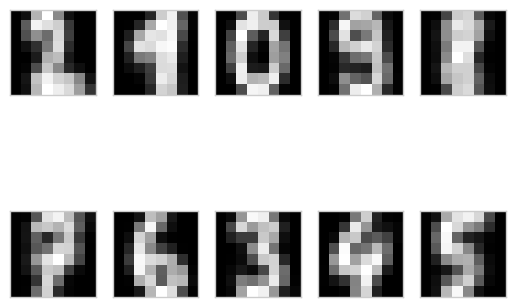

In [46]:
_, axes = plt.subplots(2, 5)
for ax, center in zip(axes.ravel(), kmeans.cluster_centers_):
    ax.matshow(center.reshape(8, 8), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

# Hierarchical Clustering - Иерархическая кластеризация

Иерархическая кластеризация - это метод кластеризации, который разделяет набор данных на кластеры, организованные в иерархическую структуру. Этот метод строит дерево кластеров, называемое дендрограммой, которое представляет собой иерархию кластеров и позволяет анализировать данные на разных уровнях детализации. Иерархическая кластеризация может быть выполнена с использованием двух основных подходов: агломеративного и дивизионного.

Вот основные идеи и характеристики иерархической кластеризации:

1. **Агломеративная кластеризация (подход слияния):** Этот метод начинает с того, что каждая точка данных представляет собой отдельный кластер, и затем на каждом шаге объединяет ближайшие кластеры в один, пока все данные не будут объединены в один кластер.

2. **Дивизионная кластеризация (подход разделения):** Этот метод начинает с того, что все данные представляют собой один кластер, и затем разделяет его на более мелкие кластеры на каждом шаге до достижения желаемой структуры кластеризации.

3. **Выбор расстояния и критерия слияния:** В иерархической кластеризации необходимо выбрать меру расстояния (например, евклидово расстояние, косинусное расстояние) и критерий слияния (например, средний, минимальный, максимальный, Ward) для определения того, какие кластеры следует объединить на каждом этапе.

4. **Дендрограмма:** Результат иерархической кластеризации представляется в виде дендрограммы, которая является деревом с уровнями иерархии. Дендрограмма позволяет визуально анализировать структуру кластеров на разных уровнях.

Применение иерархической кластеризации может быть полезным в следующих случаях:

1. **Анализ многомасштабной структуры данных:** Иерархическая кластеризация позволяет анализировать данные на разных уровнях детализации, что может быть полезно при наличии многомасштабной структуры.

2. **Визуализация данных:** Дендрограмма может быть использована для визуализации структуры данных и выявления иерархии в данных.

3. **Обнаружение выбросов:** Аномалии могут быть обнаружены как одиночные ветви в дендрограмме.

4. **Классификация и сегментация:** Иерархическая кластеризация может быть использована для классификации и сегментации данных на основе структуры кластеров.

5. **Определение числа кластеров:** Иерархическая кластеризация может помочь определить оптимальное количество кластеров, анализируя структуру дендрограммы.

Однако следует учитывать, что иерархическая кластеризация может быть вычислительно затратной, особенно при больших объемах данных, и выбор критерия слияния и расстояния требует тщательной настройки в зависимости от конкретной задачи.

In [12]:
dataset = pd.read_csv('/Users/amirmukhamedzhan/Yandex.Disk.localized/Документы/KFU/ML/ML_FALL_2023/data/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

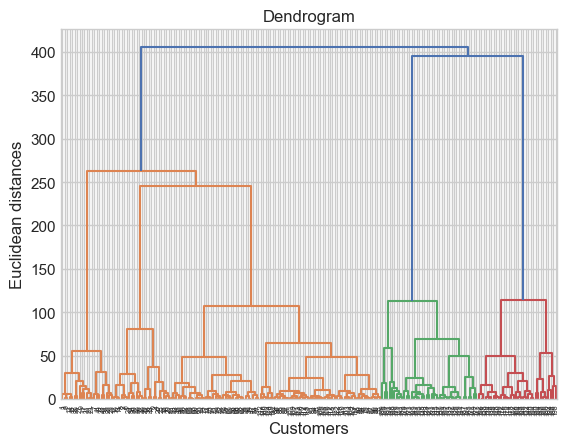

In [13]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Обучение Hierarchical Clustering (Иерархическая кластеризация - AgglomerativeClustering)

In [15]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

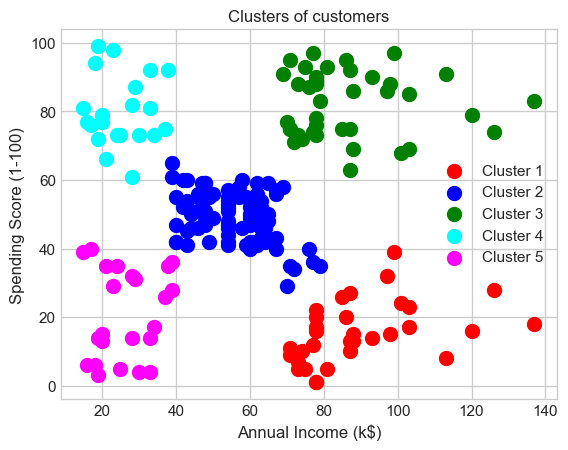

In [16]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# C-means

C-means (см. функцию C в названии) - это алгоритм кластеризации, который используется для группировки данных на основе их сходства. Этот метод применяется в машинном обучении и анализе данных и является одним из наиболее распространенных методов кластеризации.

C-means является разновидностью метода k-средних (k-means), и его цель состоит в разделении данных на кластеры таким образом, чтобы минимизировать дисперсию внутри каждого кластера. В отличие от метода k-средних, где число кластеров (k) задается заранее, в C-means число кластеров не задается изначально, а определяется автоматически на основе данных и введенного значения, называемого "фактором размытости" (или "fuzziness factor").

Основные шаги алгоритма C-means:

1. Инициализация: Начните с задания количества кластеров (c) и значения фактора размытости (обычно это число от 1 до бесконечности). Также случайно инициализируются центры кластеров.

2. Обновление принадлежности: Для каждой точки данных вычисляется принадлежность к каждому кластеру с учетом расстояния до центров кластеров и фактора размытости. Чем ближе точка к центру кластера и чем выше фактор размытости, тем больше вероятность принадлежности к этому кластеру.

3. Обновление центров: Для каждого кластера пересчитываются его центры, усредняя положение точек, входящих в этот кластер, с учетом их степени принадлежности.

4. Повторение шагов 2 и 3: Процесс обновления принадлежности и центров кластеров повторяется до тех пор, пока не будет достигнута сходимость (когда изменения становятся незначительными).

5. Получение кластеров: После сходимости каждая точка данных принадлежит одному или нескольким кластерам, в зависимости от степени принадлежности, вычисленной на шаге 2.

C-means позволяет учесть нечеткость принадлежности точек к кластерам, что полезно, если данные могут быть частично неоднозначными. Он широко используется в задачах классификации и анализа данных, таких как сегментация изображений, кластеризация текстов или анализ паттернов во временных рядах.

In [53]:
# pip install scikit-fuzzy
# conda install -c conda-forge scikit-fuzzy

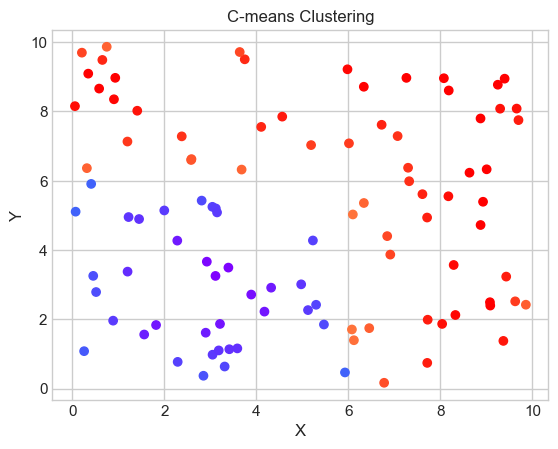

In [51]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Генерируем случайные данные для кластеризации
np.random.seed(42)
data = np.random.rand(100, 2) * 10

# Создаем нечеткую переменную для координат X и Y
x = ctrl.Antecedent(np.arange(0, 10, 0.1), 'x')
y = ctrl.Antecedent(np.arange(0, 10, 0.1), 'y')

# Создаем нечеткую переменную для принадлежности к кластерам
cluster = ctrl.Consequent(np.arange(0, 1, 0.01), 'cluster')

# Определяем функции принадлежности для координат X и Y
x['low'] = fuzz.trimf(x.universe, [0, 3, 6])
x['medium'] = fuzz.trimf(x.universe, [3, 6, 9])
x['high'] = fuzz.trimf(x.universe, [6, 9, 10])

y['low'] = fuzz.trimf(y.universe, [0, 3, 6])
y['medium'] = fuzz.trimf(y.universe, [3, 6, 9])
y['high'] = fuzz.trimf(y.universe, [6, 9, 10])

# Определяем функции принадлежности для кластеров
cluster['cluster1'] = fuzz.trimf(cluster.universe, [0, 0, 0.5])
cluster['cluster2'] = fuzz.trimf(cluster.universe, [0.4, 1, 1])

# Создаем правила для кластеризации
rule1 = ctrl.Rule(antecedent=(x['low'] & y['low']), consequent=cluster['cluster1'])
rule2 = ctrl.Rule(antecedent=(x['high'] | y['high']), consequent=cluster['cluster2'])

# Создаем систему нечеткого управления и добавляем правила
cluster_ctrl = ctrl.ControlSystem([rule1, rule2])
clustering = ctrl.ControlSystemSimulation(cluster_ctrl)

# Производим кластеризацию
cluster_membership = np.zeros(len(data))
for i, point in enumerate(data):
    clustering.input['x'] = point[0]
    clustering.input['y'] = point[1]
    clustering.compute()
    cluster_membership[i] = clustering.output['cluster']

# Визуализируем результаты
plt.scatter(data[:, 0], data[:, 1], c=cluster_membership, cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('C-means Clustering')
plt.show()


В этом примере мы создаем нечеткую систему с двумя входами (X и Y) и одним выходом (принадлежность к кластерам), определяем функции принадлежности и правила для кластеризации. Затем мы применяем алгоритм C-means для данных и визуализируем результаты с помощью библиотеки Matplotlib.

Алгоритм C-means (также известный как Fuzzy C-means или FCM) может быть применен в различных областях и сценариях, когда необходимо разделить данные на кластеры с учетом неопределенности принадлежности. Вот несколько типичных случаев, когда C-means может быть полезен:

1. **Анализ данных и сегментация изображений:** C-means часто используется для сегментации изображений, когда необходимо выделить различные объекты на изображении. Он также может использоваться для кластеризации данных в анализе данных и исследовательском анализе, чтобы выявить скрытые паттерны.

2. **Медицинский анализ:** В медицинской области C-means может использоваться для сегментации медицинских изображений, например, для выявления различных тканей на изображениях МРТ или КТ.

3. **Обработка естественного языка:** C-means может применяться для группировки текстовых данных и выявления схожих тем в корпусах текстов.

4. **Финансовый анализ:** В финансовой сфере C-means может быть использован для кластеризации активов или инвесторов с целью выявления схожих инвестиционных стратегий.

5. **Промышленный мониторинг:** В промышленности C-means может быть применен для выявления аномалий и кластеризации данных, связанных с оборудованием и производством.

6. **Рекомендательные системы:** В рекомендательных системах C-means может использоваться для группировки пользователей по схожим предпочтениям, что позволяет создавать более точные рекомендации.

7. **Биоинформатика:** В биоинформатике C-means может применяться для анализа геномных данных и кластеризации белков.

8. **Интеллектуальный анализ данных:** C-means может быть частью более крупного процесса анализа данных и машинного обучения для создания нечетких моделей и систем классификации.

Однако стоит отметить, что C-means может иметь ограничения, например, при работе с большими объемами данных, и может потребовать тщательной настройки параметров, таких как фактор размытости и количество кластеров. В зависимости от конкретной задачи и данных, иногда могут быть более подходящие методы кластеризации.

# DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) - это алгоритм кластеризации, который определяет кластеры на основе плотности данных. Это означает, что DBSCAN идентифицирует кластеры как группы точек данных, находящихся близко друг к другу и имеющих высокую плотность, и разделяет их от областей с низкой плотностью. Алгоритм DBSCAN особенно полезен, когда кластеры имеют произвольные формы и когда в данных присутствует шум.

Основные характеристики и особенности алгоритма DBSCAN:

1. **Кластеры произвольной формы:** DBSCAN может выявлять кластеры с произвольными формами, что означает, что они могут быть не только выпуклыми, но и иметь сложные и неоднородные формы.

2. **Автоматическое определение числа кластеров:** В отличие от метода k-средних (k-means), DBSCAN не требует задания числа кластеров заранее. Алгоритм автоматически определяет количество кластеров на основе плотности данных.

3. **Обработка шума:** DBSCAN автоматически обнаруживает выбросы (шум) и не включает их в кластеры. Это полезно при работе с данными, в которых могут быть шумовые точки.

4. **Параметры алгоритма:** DBSCAN имеет два основных параметра: радиус эпсилон (ε) и минимальное количество точек (MinPts). Эпсилон определяет радиус окрестности вокруг каждой точки, а MinPts задает минимальное количество точек, которые должны находиться в радиусе ε, чтобы точка была считана основной.

Основные шаги алгоритма DBSCAN:

1. **Выбор начальной точки:** Алгоритм начинает с произвольной непосещенной точки.

2. **Нахождение плотных кластеров:** Алгоритм расширяет кластер, добавляя к нему все точки, находящиеся в радиусе ε от текущей точки (включая саму эту точку), если в этом радиусе находится не менее чем MinPts точек.

3. **Поиск соседних точек:** Алгоритм рекурсивно повторяет шаг 2 для каждой новой точки, добавленной в кластер, до тех пор, пока не будут исследованы все достижимые точки внутри кластера.

4. **Поиск и создание новых кластеров:** Алгоритм переходит к следующей непосещенной точке и повторяет шаги 2 и 3. Это позволяет идентифицировать разные кластеры в данных.

5. **Завершение:** Алгоритм завершается, когда все точки данных обработаны.

DBSCAN является мощным алгоритмом для кластеризации, особенно в случаях, когда кластеры имеют различную форму и плотность. Тем не менее, выбор оптимальных параметров (ε и MinPts) может потребовать экспериментов и анализа данных.

Алгоритм DBSCAN (Density-Based Spatial Clustering of Applications with Noise) является мощным инструментом для кластеризации данных и может быть применен во множестве различных сценариев. Вот несколько типичных случаев, когда DBSCAN может быть особенно полезен:

1. **Анализ пространственных данных:** DBSCAN часто используется в геоинформационных системах для кластеризации геоданных, таких как местоположение магазинов, городских объектов, точек интереса и т. д.

2. **Сегментация изображений:** В области компьютерного зрения и обработки изображений DBSCAN может использоваться для сегментации изображений, чтобы выделить различные объекты или регионы на изображении.

3. **Обнаружение аномалий:** DBSCAN может быть использован для обнаружения аномалий в данных, таких как финансовые транзакции или качество производства. Неподходящие точки могут считаться выбросами.

4. **Кластеризация геномных данных:** В биоинформатике DBSCAN применяется для кластеризации геномных данных и выявления сходства между последовательностями ДНК.

5. **Маркетинговый анализ и рекомендательные системы:** DBSCAN может быть использован для сегментации клиентов на основе их покупательского поведения и для предоставления персонализированных рекомендаций.

6. **Анализ социальных сетей:** В области анализа социальных сетей DBSCAN может помочь выявить сообщества и группы людей, основанные на их взаимодействиях и связях.

7. **Мониторинг и анализ трафика:** DBSCAN может быть использован для анализа сетевого трафика, выявления аномалий и сегментации активности пользователей.

8. **Биомедицинские исследования:** DBSCAN может применяться для анализа данных в биомедицинских исследованиях, например, для кластеризации клеток или молекулярных данных.

9. **Проектирование VLSI-микросхем:** В проектировании микроэлектронных систем DBSCAN может использоваться для оптимизации размещения компонентов и проводов.

10. **Анализ текстовых данных:** DBSCAN может применяться для кластеризации текстовых данных, таких как новостные статьи или обзоры, для выявления сходства в содержании.

DBSCAN особенно полезен в случаях, когда данные могут содержать кластеры различной формы и размера, и когда в данных присутствует шум или выбросы. Однако выбор параметров, таких как радиус эпсилон и минимальное количество точек, требует тщательной настройки и анализа данных для достижения оптимальных результатов.

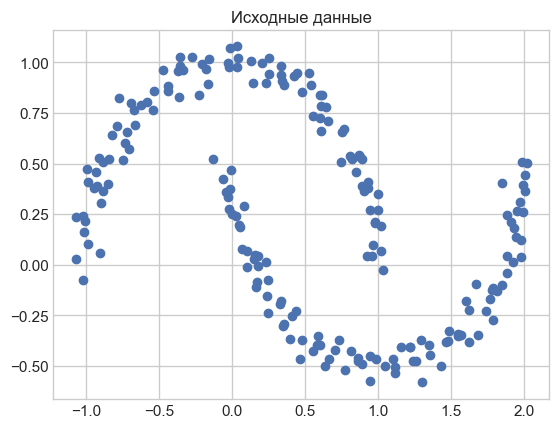

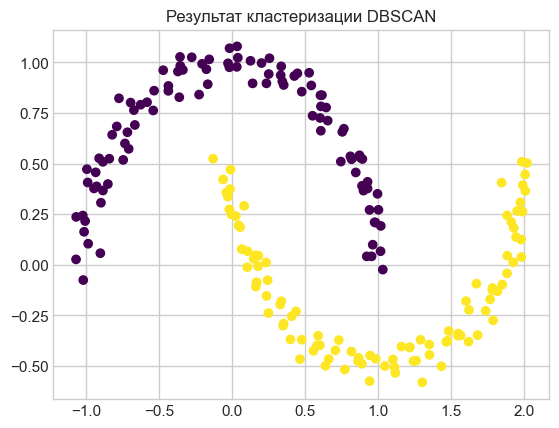

In [52]:
from sklearn.datasets import make_moons

# Создаем и визуализируем синтетические данные
X, _ = make_moons(n_samples=200, noise=0.05, random_state=0)

plt.scatter(X[:, 0], X[:, 1])
plt.title("Исходные данные")
plt.show()

# Применяем DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Визуализируем результаты
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Результат кластеризации DBSCAN")
plt.show()


В этом коде мы:

1. Создаем синтетические данные в форме "двух лун" с помощью make_moons из scikit-learn.

2. Визуализируем исходные данные.

3. Применяем алгоритм DBSCAN с параметрами eps (радиус окрестности) и min_samples (минимальное количество точек в окрестности).

4. Визуализируем результаты кластеризации, используя цвета для обозначения различных кластеров.

Обратите внимание, что параметры `eps` и `min_samples` могут варьироваться в зависимости от вашего набора данных и требований к кластеризации. Вы можете экспериментировать с этими параметрами, чтобы достичь оптимальных результатов для вашего конкретного случая.

Этот код применяет DBSCAN к данным с двумя лунами и выделит их в два кластера. Вы можете использовать подобный код и для других наборов данных, внося соответствующие изменения в исходные данные и параметры DBSCAN.